In [1]:
import pandas as pd

header_name = []

def readData(filePath: str = ""):
    # with open("./MyData/all.csv", 'r') as csvFile:
    #     reader = csv.reader(csvFile)
    #     for idx, each in enumerate(reader):
    #         if idx % 2 == 1:
    #             continue
    #         if idx == 0:
    #             header_name = each
    #             continue
    #         dataset.append(each[:])
    df = pd.read_csv(filePath)
    # print(df)
    return df


# TODO: 需要先删除过于稀疏的数据?
label: objective - 0, subjective - 1
A web url is too specific to analyse, so analyse the web domain instead

calculate the count of different domain

In [2]:
dataset = readData("./MyData/all.csv")
# print(dataset)
for key in dataset.drop(columns=["TextID","URL","site"]):
    print(dataset[key].value_counts())


objective     635
subjective    365
Name: Label, dtype: int64
151     4
140     4
109     4
150     4
225     4
       ..
451     1
195     1
453     1
456     1
2048    1
Name: totalWordsCount, Length: 707, dtype: int64
11     34
5      27
6      25
7      24
16     23
       ..
106     1
108     1
113     1
114     1
237     1
Name: semanticobjscore, Length: 129, dtype: int64
1     70
2     65
3     53
4     53
5     53
      ..
67     1
70     1
71     1
82     1
97     1
Name: semanticsubjscore, Length: 64, dtype: int64
9      45
7      42
5      40
6      40
10     39
       ..
60      1
56      1
39      1
50      1
225     1
Name: CC, Length: 96, dtype: int64
20     19
16     18
13     18
11     18
10     17
       ..
167     1
169     1
172     1
174     1
0       1
Name: CD, Length: 192, dtype: int64
0     546
1     208
2      99
3      56
4      37
5      26
6      14
9       4
8       4
7       4
12      1
10      1
Name: DT, dtype: int64
0     127
2      93
4      68
6     

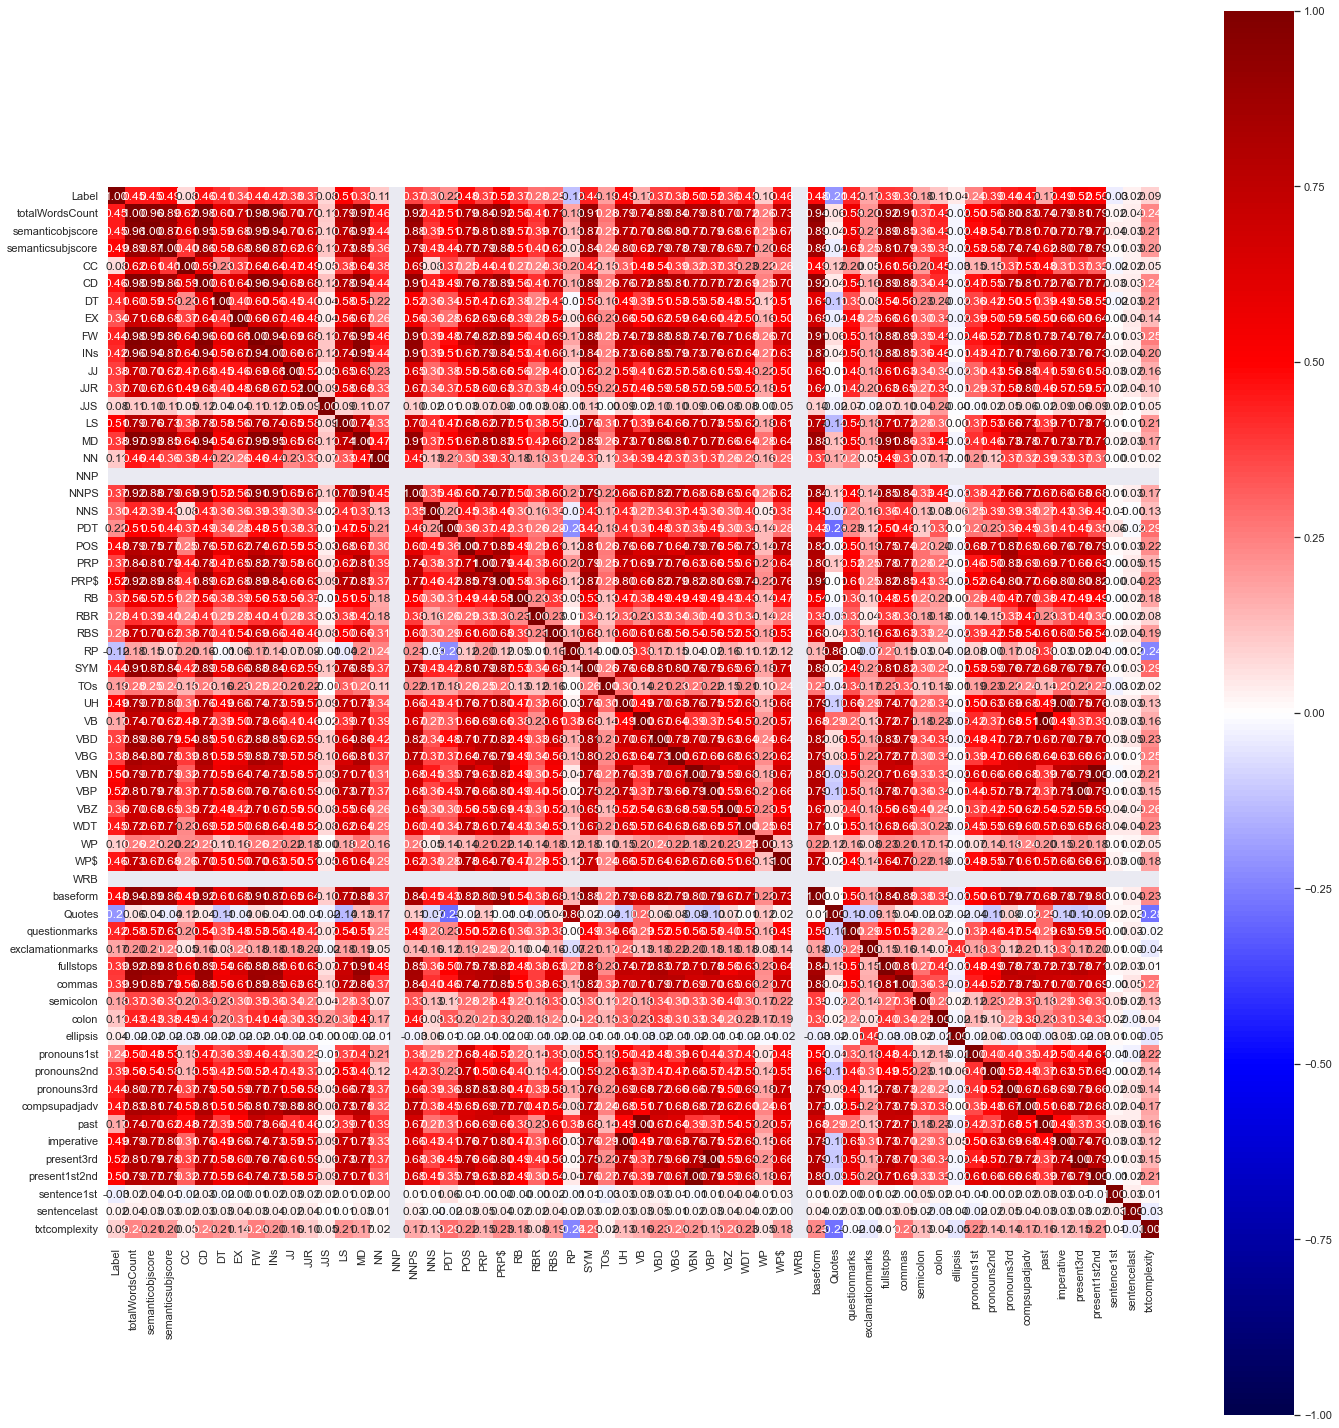

In [3]:
# correlation analysis
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
# delete string col
tmpframe = dataset.drop(columns=["TextID","URL","site"])
# map label "objective","subjective" to int, objective - 0, subjective - 1
tmpframe['Label'] = pd.factorize(tmpframe['Label'])[0].astype(int)

corMatrix = tmpframe.corr()

sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(corMatrix,cbar = True,square=True, annot=True,
            fmt=".2f", vmax=1.0, vmin=-1.0, cmap="seismic")
# plt.show()
plt.tight_layout()
plt.savefig("./correlation.pdf")

NNP and WRB is ZERO

In [4]:
print(dataset['NNP'].value_counts())

0    1000
Name: NNP, dtype: int64


In [5]:
print(dataset['WRB'].value_counts())

0    1000
Name: WRB, dtype: int64


delete NNP and WRB and draw the matrix heat map again, and drop high correlation
attributes which correlation is bigger than 0.6

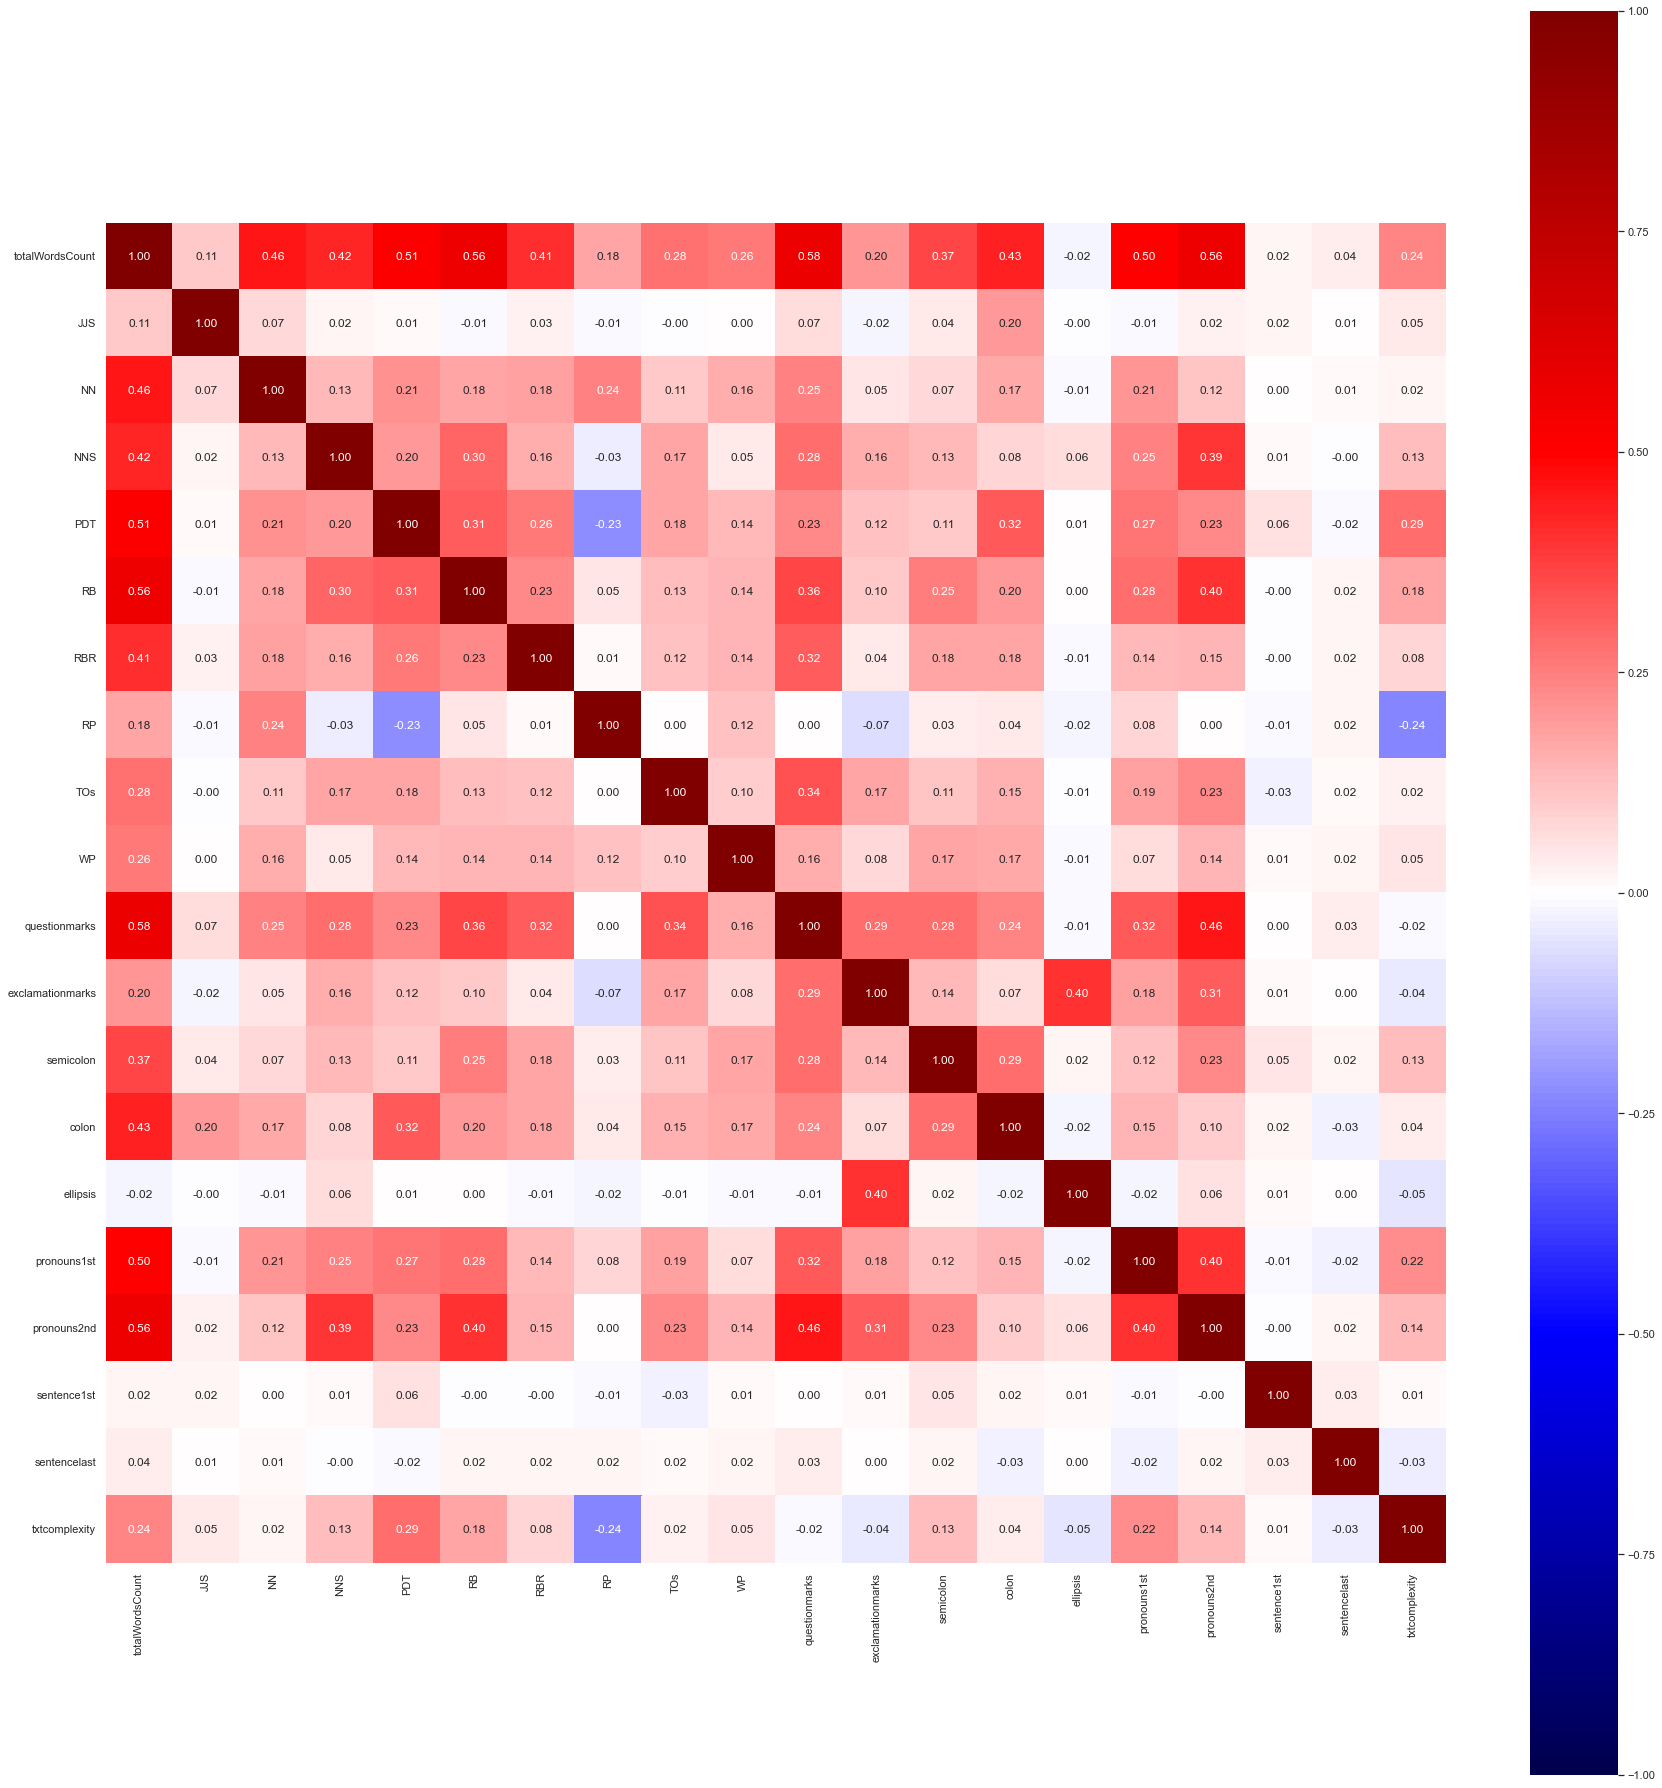

In [6]:
# delete string col
tmpframe = dataset.drop(columns=["TextID","URL","site","Label","NNP","WRB"])

corMatrix = tmpframe.corr()

# delete cols that have correlation above 0.7
deleteset = set()
for idx,colname in enumerate(corMatrix):
    if idx in deleteset:
        continue
    for i,row in enumerate(corMatrix[colname]):
        if i==idx:
            continue
        if row>=0.6:
            deleteset.add(i)
# print(deleteset)
namelist = tmpframe.columns.values
droplist = [namelist[i] for i in deleteset]
# print(droplist)
tmpframe = tmpframe.drop(columns=droplist)

corMatrix = tmpframe.corr()
sns.set(rc = {'figure.figsize':(25,25)})
sns.heatmap(corMatrix,cbar = True,square=True, annot=True,
            fmt=".2f", vmax=1.0, vmin=-1.0, cmap="seismic")
# plt.show()
plt.tight_layout()
plt.savefig("./correlation_after.pdf")

In [7]:
droplist += ["TextID","URL","NNP","WRB"]
dataset.drop(columns=droplist)
print(dataset)
with open("./droplist.txt",'w+') as f:
    for each in droplist:
        f.write(each+',')

       TextID                                                URL       Label  \
0    Text0001  http://msn.foxsports.com/foxsoccer/mexico/stor...   objective   
1    Text0002  http://msn.foxsports.com/foxsoccer/premierleag...   objective   
2    Text0003  http://uk.eurosport.yahoo.com/04022011/58/fed-...   objective   
3    Text0004  http://uk.eurosport.yahoo.com/07022011/58/bund...   objective   
4    Text0005  http://uk.eurosport.yahoo.com/05022011/58/fed-...   objective   
..        ...                                                ...         ...   
995  Text0996  http://www.nba.com/pistons/news/blaha_090313.html  subjective   
996  Text0997  http://www.nba.com/pistons/news/smashing_succe...  subjective   
997  Text0998  http://www.foxsportswest.com/01/07/13/Hypocrit...  subjective   
998  Text0999  http://www.football365.com/f365-features/84318...  subjective   
999  Text1000  http://www.nba.com/pistons/features/blaha_1103...  subjective   

     totalWordsCount  semanticobjscore 

Remove those attritubes in the dataset and write them to file

In [8]:
path = ["all.csv",'train.csv','test.csv']
for p in path:
    df = readData("./MyData/"+p)
    df = df.drop(columns=droplist)
    df.to_csv("./MyData_New/"+p)